In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
FraudC = pd.read_csv("Fraud_check.csv")
FraudC.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
FraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
FraudC.shape

(600, 6)

In [5]:
FraudC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
FraudC.columns
FraudC.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

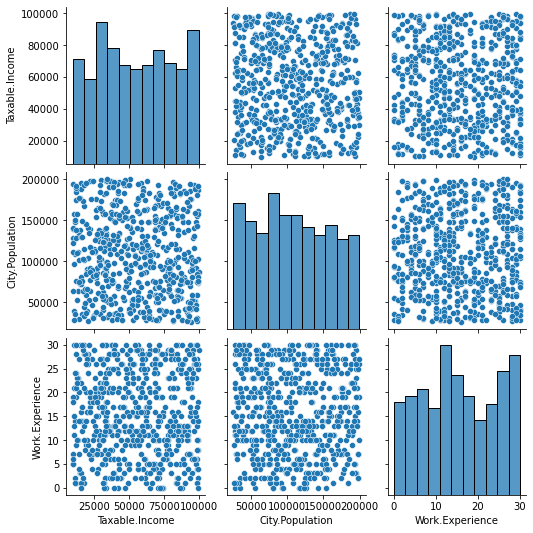

In [7]:
sns.pairplot(FraudC)
FraudC["TaxInc"] = pd.cut(FraudC["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
FraudCheck = FraudC.drop(columns=["Taxable.Income"])

In [8]:
FCheck = pd.get_dummies(FraudCheck.drop(columns = ["TaxInc"]))
FraudC_final = pd.concat([FCheck, FraudCheck["TaxInc"]], axis = 1)
colnames = list(FraudC_final.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [9]:
predictors = colnames[:9]
predictors
target = colnames[9]
target


'TaxInc'

In [10]:
X = FraudC_final[predictors]
X.shape
Y = FraudC_final[target]

# Decision Tree Building

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(FraudC_final, test_size = 0.3)
FraudC_final["TaxInc"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [12]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)
modelTree = DecisionTreeClassifier(criterion = "entropy")
modelTree.fit(train[predictors], train[[target]])
type([target])
type(predictors)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

list

In [13]:
#Prediction
preds = modelTree.predict(test[predictors])
preds
type(preds)

numpy.ndarray

In [14]:
pd.Series(preds).value_counts()
141/(141+39)
pd.crosstab(test[target],preds) #64%
temp = pd.Series(modelTree.predict(train[predictors])).reset_index(drop=True)
np.mean(pd.Series(train.TaxInc).reset_index(drop=True)==pd.Series(modelTree.predict(train[predictors])))
np.mean(preds==test.TaxInc)

0.6222222222222222

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = 3, oob_score = True, n_estimators = 15, criterion = "entropy")

In [16]:
np.shape(FraudC_final) # 600,100 => Shape 
len(Y)
len(X)

600

In [17]:
FraudC_final.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
FraudC_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City.Population          600 non-null    int64   
 1   Work.Experience          600 non-null    int64   
 2   Undergrad_NO             600 non-null    uint8   
 3   Undergrad_YES            600 non-null    uint8   
 4   Marital.Status_Divorced  600 non-null    uint8   
 5   Marital.Status_Married   600 non-null    uint8   
 6   Marital.Status_Single    600 non-null    uint8   
 7   Urban_NO                 600 non-null    uint8   
 8   Urban_YES                600 non-null    uint8   
 9   TaxInc                   600 non-null    category
dtypes: category(1), int64(2), uint8(7)
memory usage: 14.3 KB


In [19]:
type([X])
type([Y])
Y1 = pd.DataFrame(Y)
type(Y1)

pandas.core.frame.DataFrame

In [20]:
rf.fit(X,Y1) 
rf.estimators_ 
rf.classes_ 
rf.n_classes_ 
rf.n_features_  
rf.n_outputs_ 
rf.oob_score_  
rf.predict(X)

<ipython-input-20-7708b846b6bb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,Y1)


array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',

In [21]:
FraudC_final['rf_pred'] = rf.predict(X)
cols = ['rf_pred','TaxInc']
FraudC_final[cols].head()
FraudC_final["TaxInc"]

from sklearn.metrics import confusion_matrix

confusion_matrix(FraudC_final['TaxInc'],FraudC_final['rf_pred']) # Confusion matrix

pd.crosstab(FraudC_final['TaxInc'],FraudC_final['rf_pred'])



print("Accuracy",(476+115)/(476+115+9+0)*100)
#98.5%

FraudC_final["rf_pred"]

Accuracy 98.5


0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: rf_pred, Length: 600, dtype: object

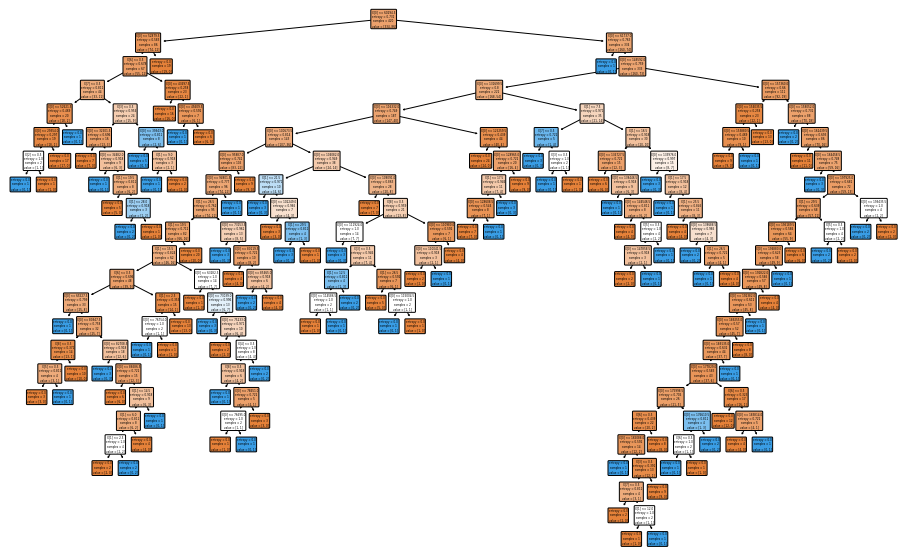

In [22]:
# Prepare a plot figure with set size.
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(modelTree,rounded = True,filled = True)# Display the tree plot figure.
plt.show()

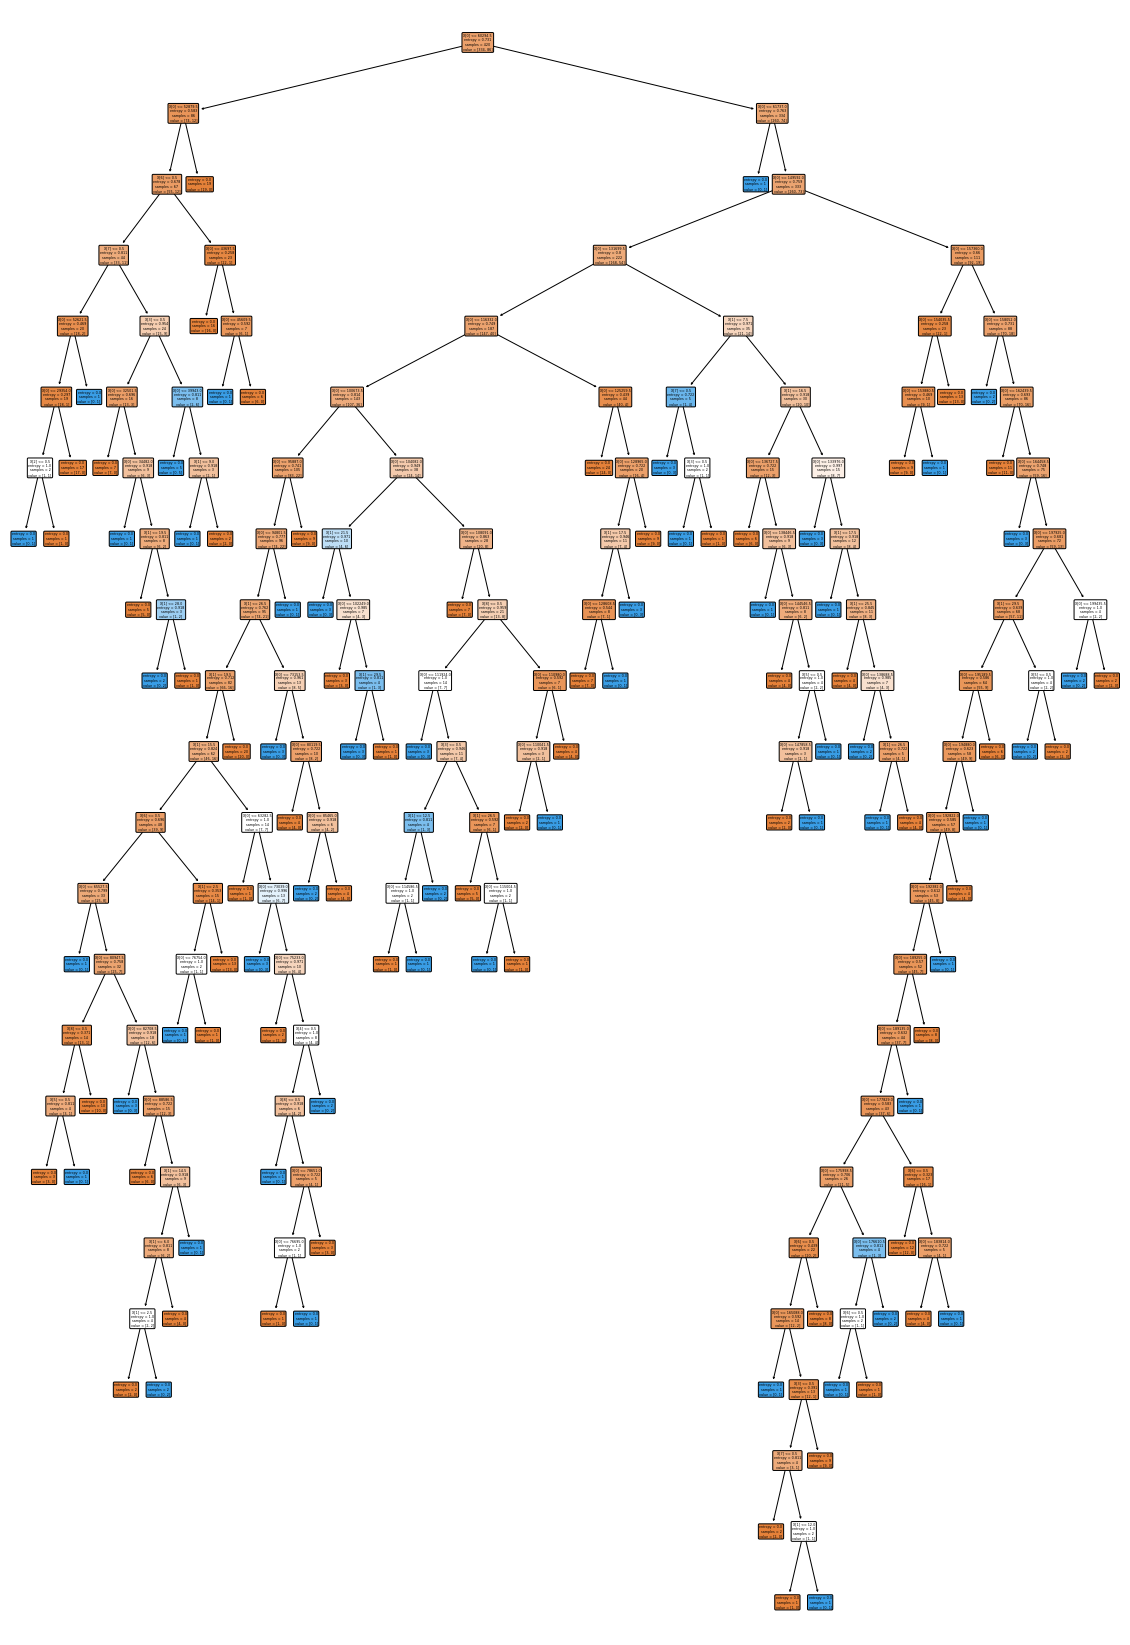

In [28]:
plt.figure(figsize = (20,30))
# Plot the decision tree.
plot_tree(modelTree,rounded = True,filled = True)# Display the tree plot figure.
plt.show()